In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 1.读取数据
data_file_csv1 = 'inner_20_0_new.csv'
data_file_csv2 = 'ball_20_0_new.csv'
data_file_csv3 = 'outer_20_0_new.csv'
data_file_csv4 = 'comb_20_0_new.csv'
data_file_csv5 = 'health_20_0_new.csv'
origin_data1 = pd.read_csv(data_file_csv1)
origin_data2 = pd.read_csv(data_file_csv2)
origin_data3 = pd.read_csv(data_file_csv3)
origin_data4 = pd.read_csv(data_file_csv4)
origin_data5 = pd.read_csv(data_file_csv5)

print(origin_data1.shape)
print(origin_data2.shape)
print(origin_data3.shape)
print(origin_data4.shape)
print(origin_data5.shape)
origin_data1.head()


(1048560, 8)
(1048560, 8)
(1048560, 8)
(1048560, 8)
(1048560, 8)


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,-0.117462,-0.001712,0.001460,0.007768,0.002619,0.003544,0.003097,-0.007119
1,-0.122317,-0.000914,-0.004050,-0.006717,0.003122,-0.012211,0.005323,-0.002731
2,-0.121311,0.004437,0.003101,0.007753,0.006050,0.003830,-0.007553,0.008774
3,-0.120751,-0.007136,-0.002774,0.002573,0.006198,0.001988,-0.001854,0.002958
4,-0.117236,-0.000008,0.000765,-0.007696,0.002301,0.004705,0.000281,0.005544


In [2]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = origin_data1['Column3']
data_list2 = origin_data2['Column3']
data_list3 = origin_data3['Column3']
data_list4 = origin_data4['Column3']
time_step= 1024
# 划窗取值（1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]

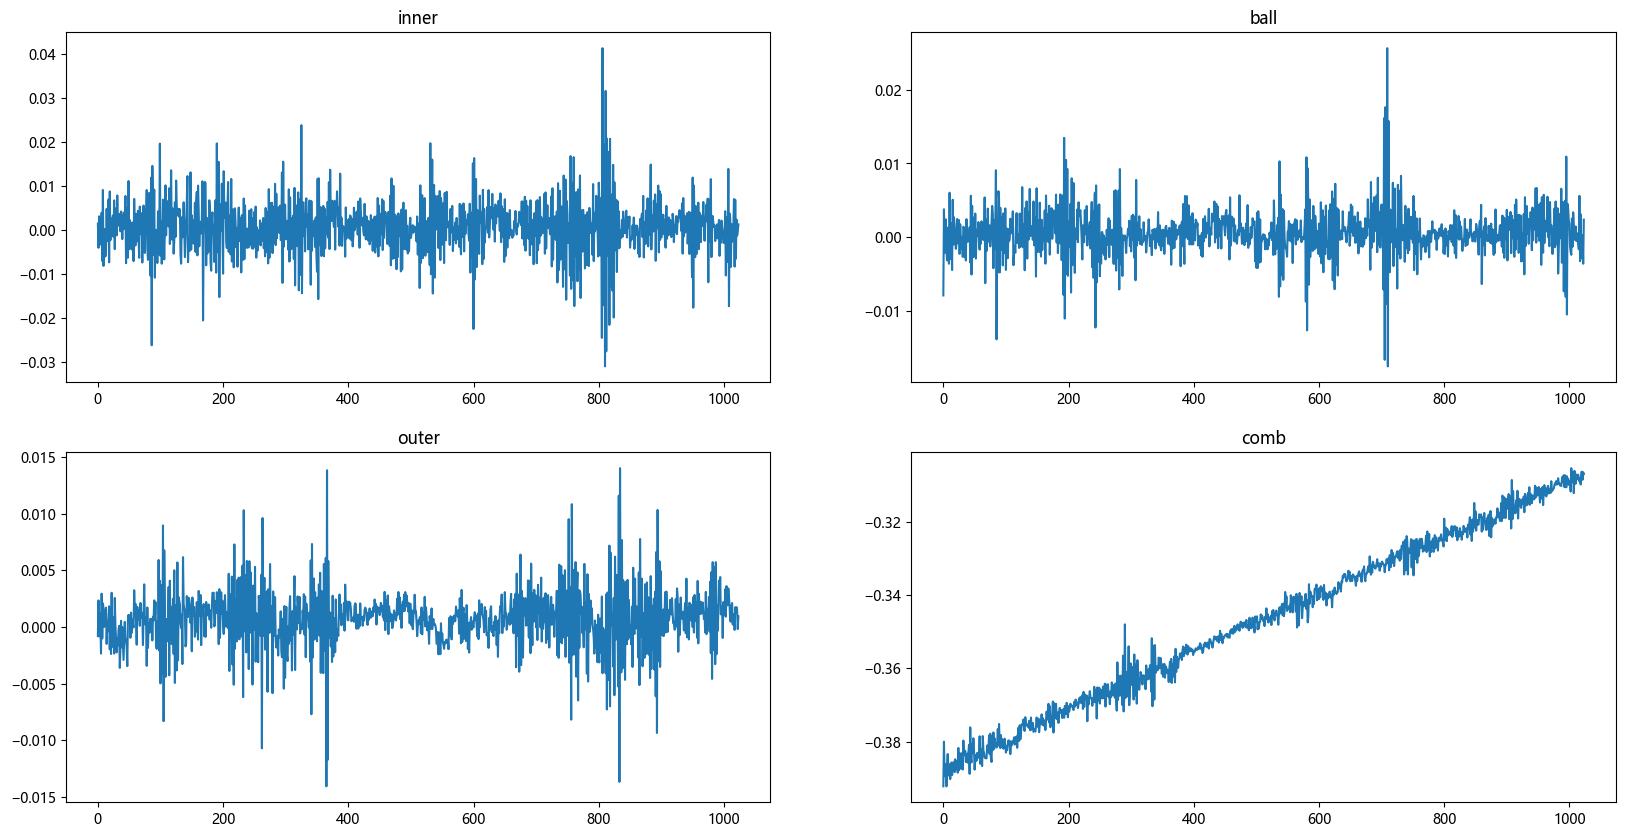

In [3]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(data_list1)
plt.title('inner')
plt.subplot(2,2,2)
plt.plot(data_list2)
plt.title('ball')
plt.subplot(2,2,3)
plt.plot(data_list3)
plt.title('outer')
plt.subplot(2,2,4)
plt.plot(data_list4)
plt.title('comb')

plt.show()

[0.00465295 0.01997751 0.00186648 0.00569143 0.02431567]


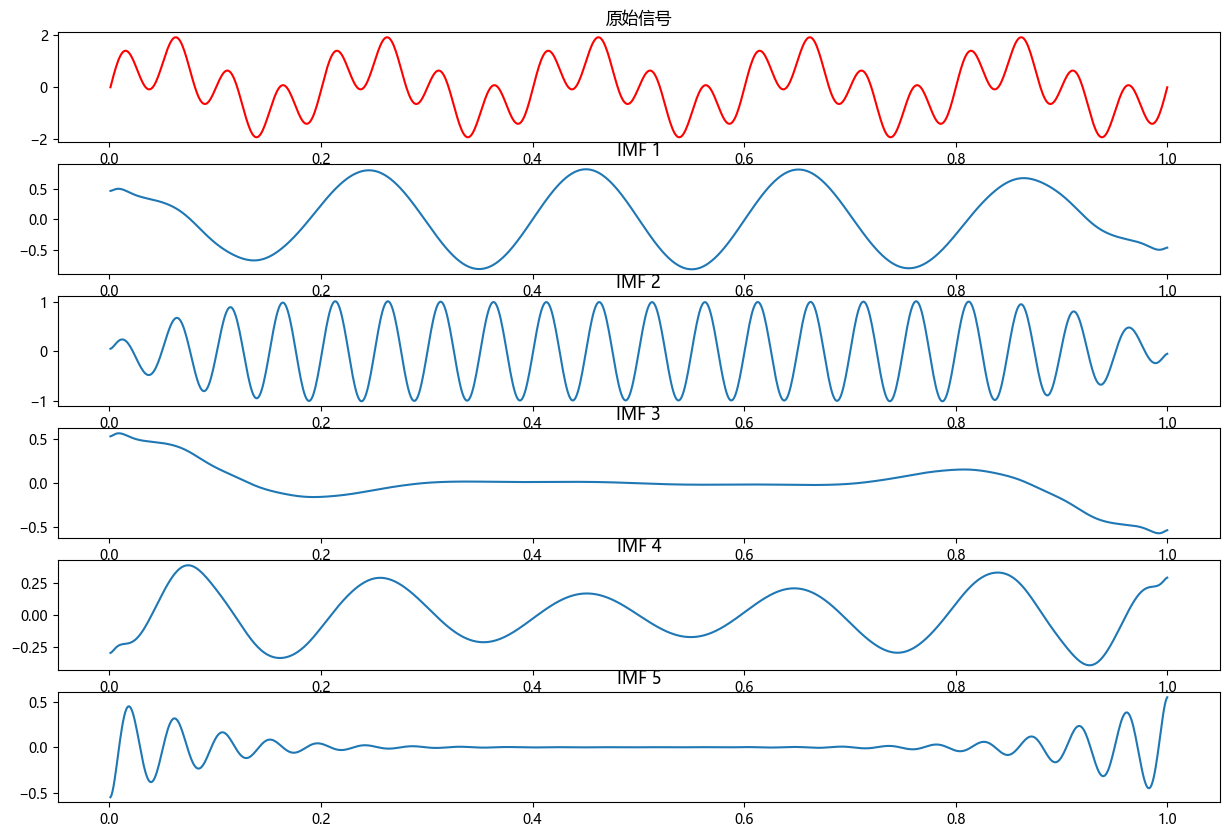

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# -----测试信号及其参数--start-------------
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)

T = len(signal)
fs = 1/T
t = np.arange(1,T+1)/T

# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000

#噪声容限，一般取 0, 即允许重构后的信号与原始信号有差别。
tau = 0 
#模态数量  分解模态（IMF）个数
K = 5

#DC 合成信号若无常量，取值为 0；若含常量，则其取值为 1
# DC 若为0则让第一个IMF为直流分量/趋势向量
DC = 0 

#初始化ω值，当初始化为 1 时，均匀分布产生的随机数
# init 指每个IMF的中心频率进行初始化。当初始化为1时，进行均匀初始化。
init = 1 

#控制误差大小常量，决定精度与迭代次数
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(signal, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# Plot the original signal and decomposed modes
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(t, signal, 'r')
plt.title("原始信号")

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(t, u[num,:])
    plt.title("IMF "+str(num+1))

plt.show()


根据不同K值条件下， 观察中心频率，选定K值

In [6]:
import pandas as pd
from vmdpy import VMD

data = np.array(data_list1)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
df

,0,1,2,3,4,5,6,7
0,0.010637,0.179334,0.417944,NaN,NaN,NaN,NaN,NaN
1,0.010551,0.175077,0.345993,0.423134,NaN,NaN,NaN,NaN
2,0.010170,0.114764,0.187643,0.346026,0.423231,NaN,NaN,NaN
3,0.010083,0.108378,0.183723,0.343583,0.401334,0.440182,NaN,NaN
4,0.009880,0.098449,0.168243,0.219434,0.343777,0.402644,0.440700,NaN
5,0.009641,0.084758,0.167370,0.217880,0.342325,0.387207,0.416304,0.446879


根据不同K值条件下， 观察中心频率，选定K值；从K=4开始出现中心频率相近的模态，出现过分解，故模态数 K 选为4。

In [7]:
import pandas as pd
data = np.array(data_list2)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
df

,0,1,2,3,4,5,6,7
0,0.002858,0.185170,0.403876,NaN,NaN,NaN,NaN,NaN
1,0.002684,0.106071,0.348318,0.413373,NaN,NaN,NaN,NaN
2,0.002627,0.102432,0.186631,0.348400,0.413383,NaN,NaN,NaN
3,0.002603,0.101325,0.182683,0.251046,0.349015,0.415148,NaN,NaN
4,0.002592,0.101320,0.178651,0.221413,0.345517,0.396996,0.441474,NaN
5,0.002289,0.065032,0.107451,0.183125,0.243193,0.345606,0.396979,0.441433


In [8]:
import pandas as pd
data = np.array(data_list4)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
df

,0,1,2,3,4,5,6,7
0,0.000001,0.191603,0.344713,NaN,NaN,NaN,NaN,NaN
1,0.000001,0.127115,0.262665,0.345418,NaN,NaN,NaN,NaN
2,0.000001,0.125842,0.195204,0.342975,0.420105,NaN,NaN,NaN
3,0.000001,0.125291,0.193663,0.263818,0.343417,0.421314,NaN,NaN
4,0.000001,0.021588,0.126280,0.195078,0.332773,0.353771,0.42499,NaN
5,0.000001,0.021541,0.126222,0.194079,0.263555,0.342401,0.40103,0.436786


In [9]:
import pandas as pd
data = np.array(data_list3)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
df

,0,1,2,3,4,5,6,7
0,0.002434,0.128892,0.438317,NaN,NaN,NaN,NaN,NaN
1,0.002422,0.128531,0.355259,0.445584,NaN,NaN,NaN,NaN
2,0.002397,0.126588,0.193752,0.355384,0.445591,NaN,NaN,NaN
3,0.002391,0.126497,0.193469,0.348397,0.406915,0.455175,NaN,NaN
4,0.002171,0.068812,0.127609,0.193674,0.348418,0.406913,0.455168,NaN
5,0.002168,0.068762,0.127578,0.193595,0.346983,0.399885,0.430995,0.460846


[0.01055075 0.17507703 0.34599251 0.42313367]


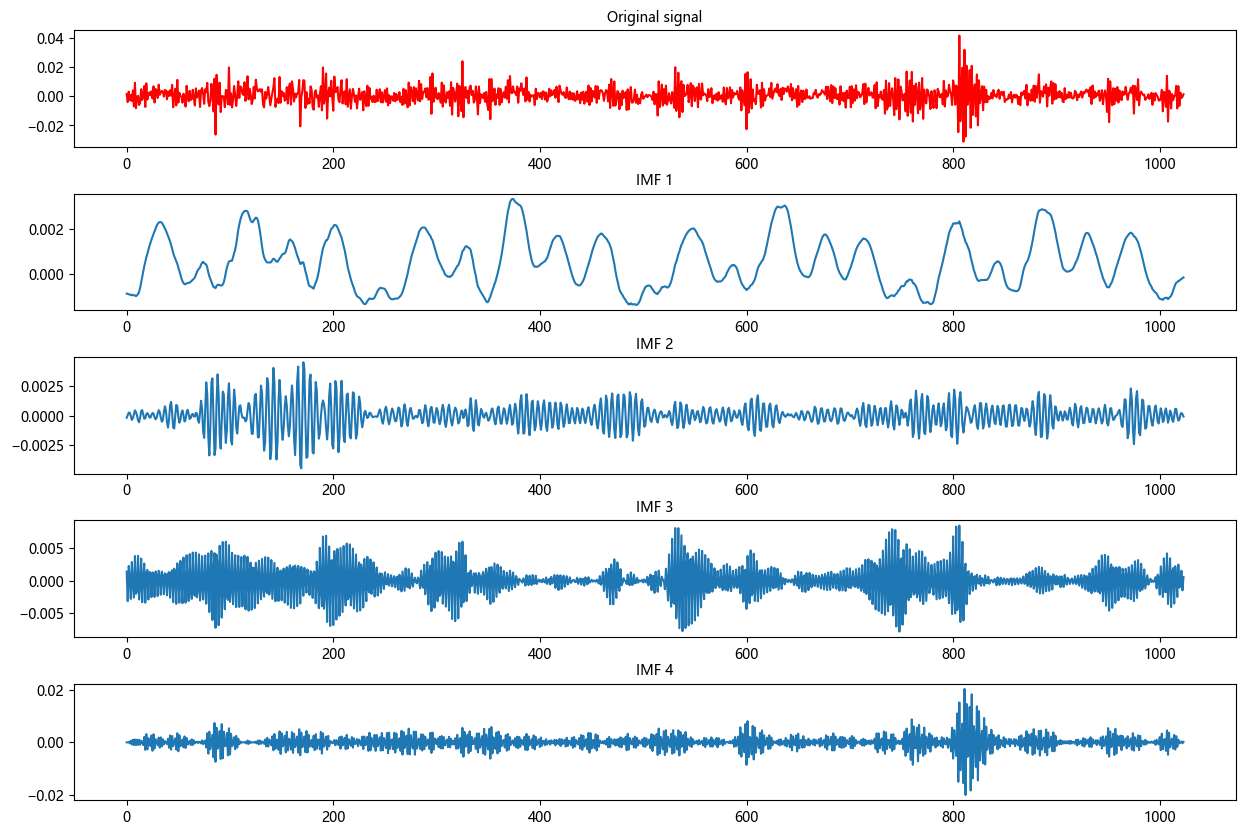

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list1)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()


[0.00268356 0.10607143 0.34831772 0.41337313]


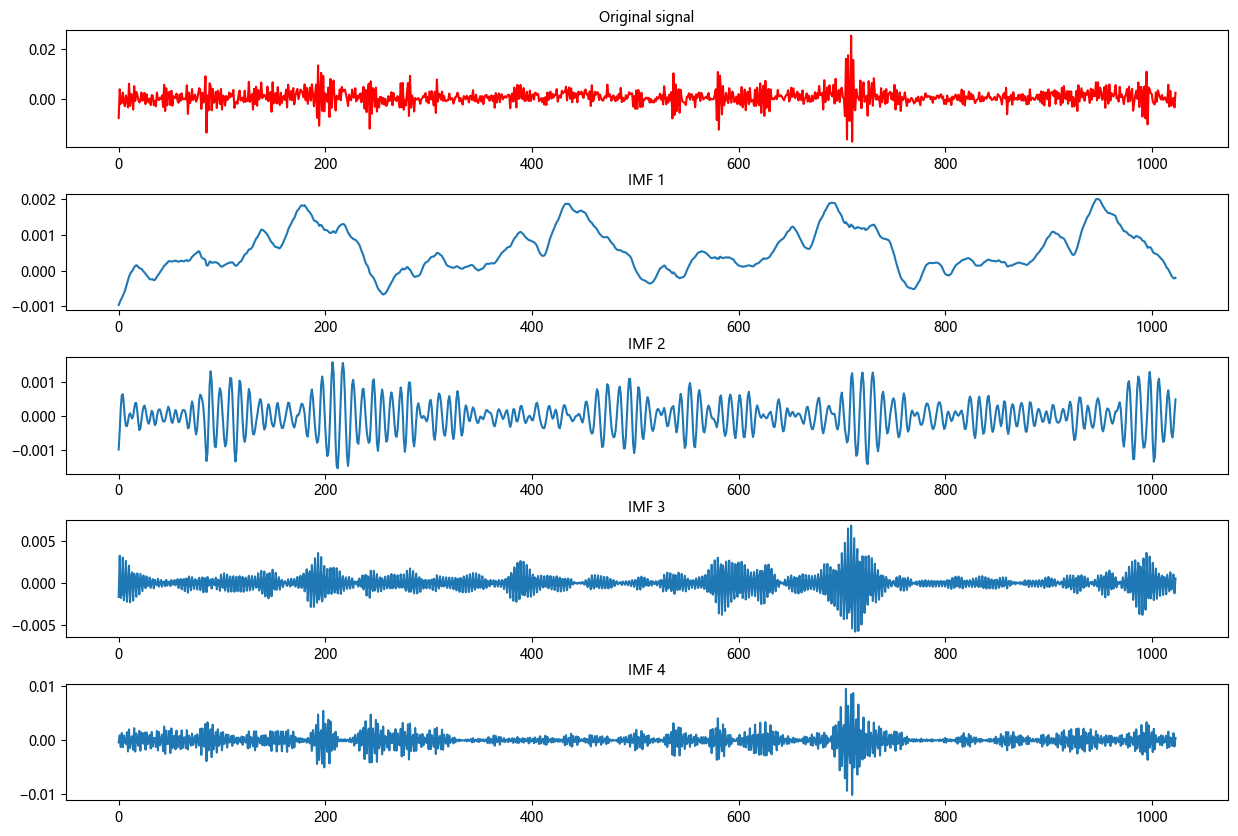

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list2)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()


[0.00242192 0.12853075 0.35525916 0.44558405]


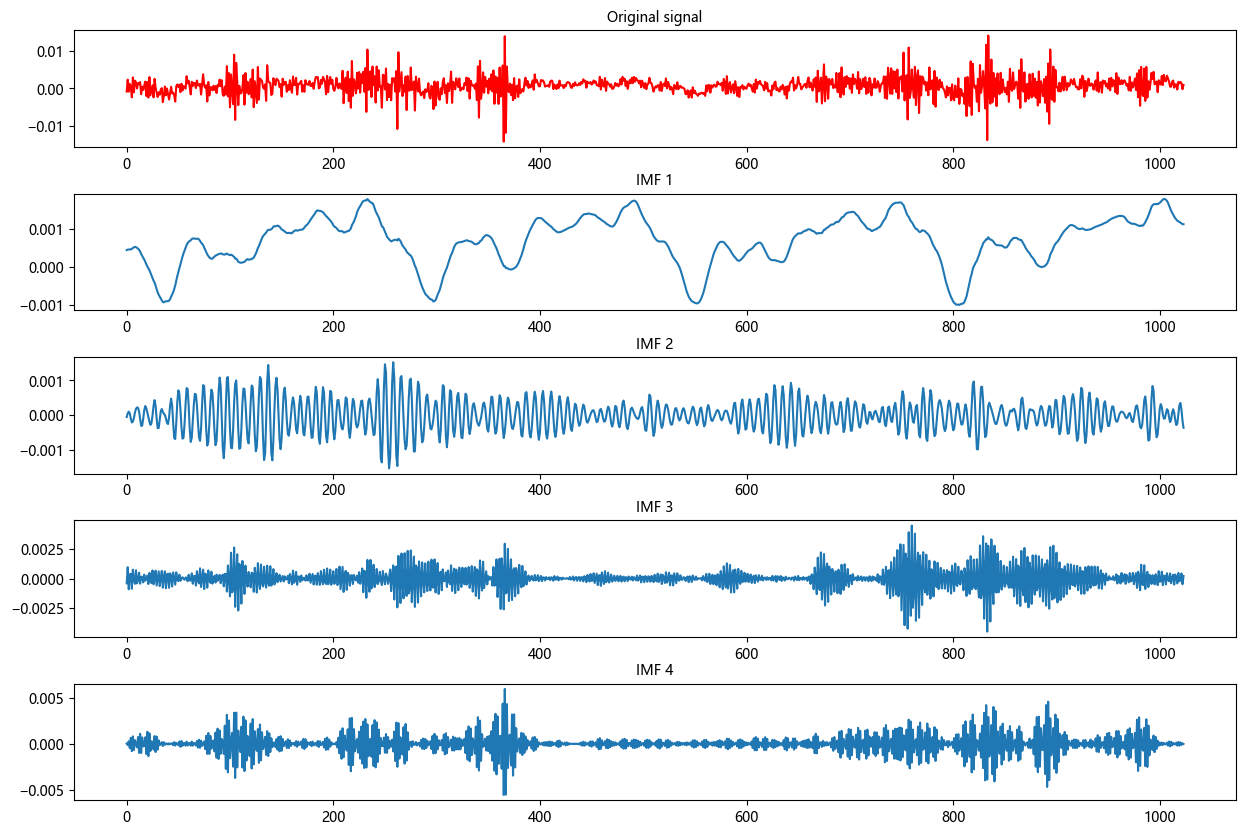

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list3)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

In [13]:
print(u.shape)
u

(4, 1024)


array([[ 4.40127902e-04,  4.52631251e-04,  4.52573094e-04, ...,
         1.13379894e-03,  1.11723141e-03,  1.11435953e-03],
       [-4.61689708e-05,  5.75735216e-05,  1.08283514e-04, ...,
         1.69795495e-04, -1.40778939e-04, -3.53095440e-04],
       [-4.03867794e-04,  9.43952435e-04, -9.01024123e-04, ...,
         4.24705160e-04, -4.76927600e-04,  2.05843306e-04],
       [ 3.09577736e-05, -1.30720669e-04,  2.78615531e-04, ...,
        -1.15000393e-04,  5.77989874e-05, -1.47094076e-05]])